## Data Visualization

The GrLivArea which defined the total living area is the most correlated predictor to the SalePrice.    
It will be used as the underlying plot for most visualizations

### Housekeeping

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
# Global Variables
%store -r CONTINUOUS_VARIABLES
%store -r DISCRETE_VARIABLES
%store -r TARGET_VARIABLE
%store -r filename

In [80]:
# Show all the columns in data frame
pd.set_option("display.max_columns", 120)

In [81]:
sns.set_style("white")

### Load the data

In [82]:
df = pd.read_csv('data/{}-transformed.csv'.format(filename))

In [83]:
df.shape

(1460, 76)

### Features with Binary Characteristics

Some of the features in the dataset are assumed to have an effect on the SalesPrice based on whether it is present or not. For example, existence of second floor in a house could be an important predictor of price, but the exact size of the second floor may be deemed not so important

In [84]:
# Factorize the columns
columns = ['2ndFlrSF','TotalBsmtSF','Fireplaces','GarageArea','PoolArea','TotalPorchSF']
for col in columns:
    df['has_'+col] = df[col].apply(lambda x: 1 if x > 0 else 0)

In [85]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,has_2ndFlrSF,has_TotalBsmtSF,has_Fireplaces,has_GarageArea,has_PoolArea,has_TotalPorchSF
0,1,60,RL,10.427530,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,3,3,2,706,5,0,150,198.284295,GasA,0,Y,4,856,854,0,7.600483,1,0,2,1,3,1,2,8,6,0,Attchd,1,2,204.517915,4,4,2,0,61,0,0,0,0,2,2008,WD,Normal,208500,20.729442,11.124668,3.5,1,1,0,1,0,1
1,2,20,RL,10.596444,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,3,1,0,978,5,0,284,264.601145,GasA,0,Y,4,1262,0,0,7.284379,0,1,2,0,3,1,3,6,6,1,Attchd,1,2,177.329636,4,4,2,298,0,0,0,0,0,5,2007,WD,Normal,181500,20.638826,23.806809,2.5,0,1,1,1,0,1
2,3,60,RL,10.807339,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,3,2,2,486,5,0,434,209.206786,GasA,0,Y,4,920,866,0,7.645779,1,0,2,1,3,1,2,6,6,1,Attchd,1,2,222.579733,4,4,2,0,42,0,0,0,0,9,2008,WD,Normal,223500,21.023347,9.197105,3.5,1,1,1,1,0,1
3,4,70,RL,10.589518,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,3,1,3,0,216,5,0,540,180.779930,GasA,2,Y,4,961,756,0,7.604738,1,0,1,0,3,1,2,7,6,1,Detchd,2,3,232.664362,4,4,2,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,20.527193,24.135762,2.0,1,1,1,1,0,1
4,5,60,RL,11.124528,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,3,0,2,655,5,0,490,246.150776,GasA,0,Y,4,1145,1053,0,7.862154,1,0,2,1,4,1,2,9,6,1,Attchd,1,3,288.451992,4,4,2,192,84,0,0,0,0,12,2008,WD,Normal,250000,22.227136,22.977765,3.5,1,1,1,1,0,1


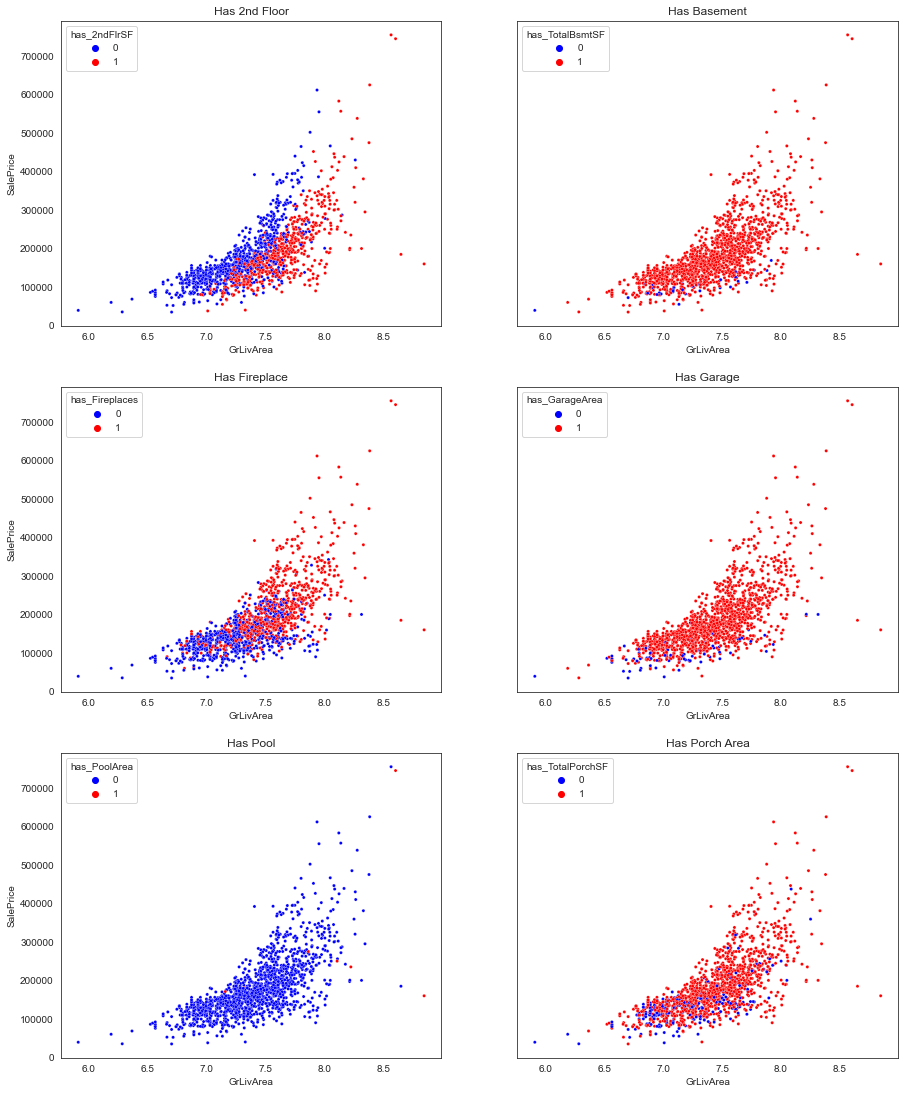

In [86]:
cols = ['has_2ndFlrSF','has_TotalBsmtSF','has_Fireplaces','has_GarageArea','has_PoolArea','has_TotalPorchSF']
titles = ['Has 2nd Floor','Has Basement','Has Fireplace','Has Garage','Has Pool','Has Porch Area']
fig, axes = plt.subplots(3, 2, figsize=(15, 6), sharey=True)
plt.subplots_adjust(bottom=0.1, top=2.5)
index = 0

for i in range(3):
    for j in range(2):
        axes[i][j].set_title(titles[index])
        sns.scatterplot(x="GrLivArea", y="SalePrice", hue=df[cols[index]], s=10, data=df, palette=['blue','red'], ax=axes[i][j])
        index += 1

- **2nd Floor**: The impact of having a second floor to the sales price of the house is not very clear. 
- **Basement**: Nearly all of the houses in the dataset have a basement, indicating that this may not be an important feature when estimating the house price. Although, we do see that the few houses which do not have a basement are in the lower end of the price spectrum
- **Fireplace**: The bigger and more expensive houses are most likely to have a fireplace, which makes this an important predictor
- **Garages**: Although most of the houses in the dataset have Garages, but for houses with similar living area having a Garage has a positive impact on the price
- **Pools**: Very few houses have a pool which makes this insignificant when determining house price
- **Porch**: Again, most houses have a porch and based on the graph it is not possible to clearly determine the affect on house price

### Building Type

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

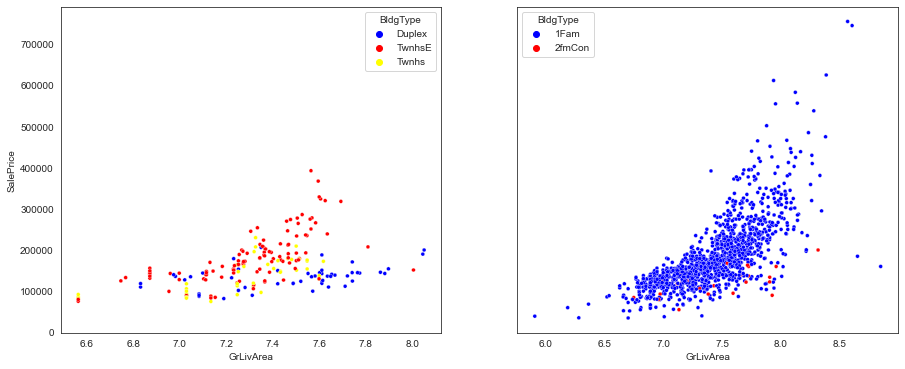

In [87]:
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

data = df.loc[df['BldgType'].isin(['Duplex','TwnhsE','Twnhs'])]
sns.scatterplot(x="GrLivArea", y="SalePrice", hue='BldgType', s=15, data=data, palette=['blue','red','yellow'], ax=axes1)

data = df.loc[df['BldgType'].isin(['1Fam','2fmCon'])]
sns.scatterplot(x="GrLivArea", y="SalePrice", hue='BldgType', s=15, data=data, palette=['blue','red'], ax=axes2)

Looking at the sub-clusters in the above graph, we can group the building type as
- 1Fam
- 2Fam
- Twnhs

In [88]:
df['BldgType'] = df['BldgType'].apply(lambda x: "Twnhs" if x in ("TwnhsE", "Twnhs") else x)
df['BldgType'] = df['BldgType'].apply(lambda x: "2Fam" if x in ("2fmCon", "Duplex") else x)
build_type = pd.get_dummies(df['BldgType'], prefix="build_type")
df = pd.concat([df, build_type], axis=1)
del df['BldgType']
DISCRETE_VARIABLES.remove('BldgType')

In [89]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,has_2ndFlrSF,has_TotalBsmtSF,has_Fireplaces,has_GarageArea,has_PoolArea,has_TotalPorchSF,build_type_1Fam,build_type_2Fam,build_type_Twnhs
0,1,60,RL,10.427530,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,3,3,2,706,5,0,150,198.284295,GasA,0,Y,4,856,854,0,7.600483,1,0,2,1,3,1,2,8,6,0,Attchd,1,2,204.517915,4,4,2,0,61,0,0,0,0,2,2008,WD,Normal,208500,20.729442,11.124668,3.5,1,1,0,1,0,1,1,0,0
1,2,20,RL,10.596444,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,3,1,0,978,5,0,284,264.601145,GasA,0,Y,4,1262,0,0,7.284379,0,1,2,0,3,1,3,6,6,1,Attchd,1,2,177.329636,4,4,2,298,0,0,0,0,0,5,2007,WD,Normal,181500,20.638826,23.806809,2.5,0,1,1,1,0,1,1,0,0
2,3,60,RL,10.807339,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,3,2,2,486,5,0,434,209.206786,GasA,0,Y,4,920,866,0,7.645779,1,0,2,1,3,1,2,6,6,1,Attchd,1,2,222.579733,4,4,2,0,42,0,0,0,0,9,2008,WD,Normal,223500,21.023347,9.197105,3.5,1,1,1,1,0,1,1,0,0
3,4,70,RL,10.589518,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,3,1,3,0,216,5,0,540,180.779930,GasA,2,Y,4,961,756,0,7.604738,1,0,1,0,3,1,2,7,6,1,Detchd,2,3,232.664362,4,4,2,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,20.527193,24.135762,2.0,1,1,1,1,0,1,1,0,0
4,5,60,RL,11.124528,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,3,0,2,655,5,0,490,246.150776,GasA,0,Y,4,1145,1053,0,7.862154,1,0,2,1,4,1,2,9,6,1,Attchd,1,3,288.451992,4,4,2,192,84,0,0,0,0,12,2008,WD,Normal,250000,22.227136,22.977765,3.5,1,1,1,1,0,1,1,0,0


### Air Conditioning

Air conditioning clearly increases the price of the house

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

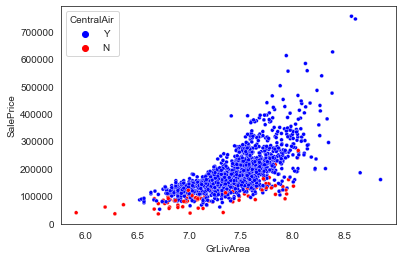

In [90]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="CentralAir", s=15, data=df, palette=['blue','red'])

In [91]:
df['AirCon'] = df['CentralAir'].apply(lambda x: 1 if x == "Y" else 0).astype(int)
del df['CentralAir']
DISCRETE_VARIABLES.remove('CentralAir')

### Conditions

Text(0.5, 1.0, 'Adjacent to postive off-site feature')

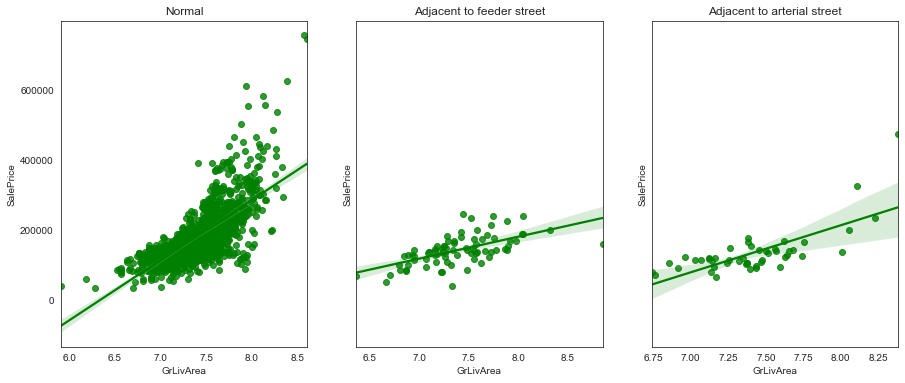

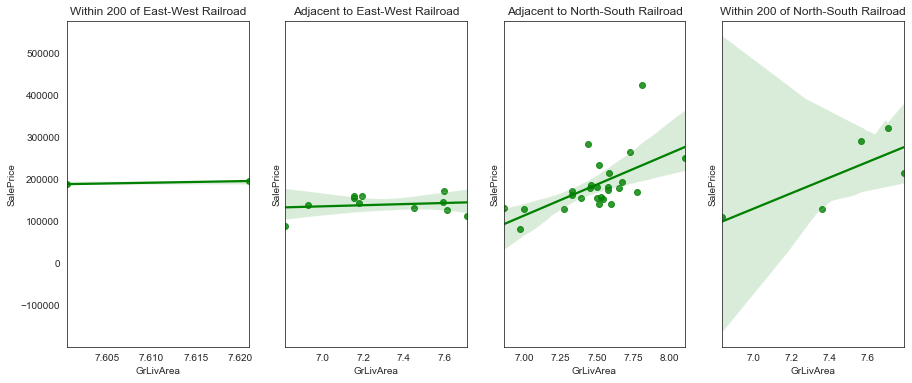

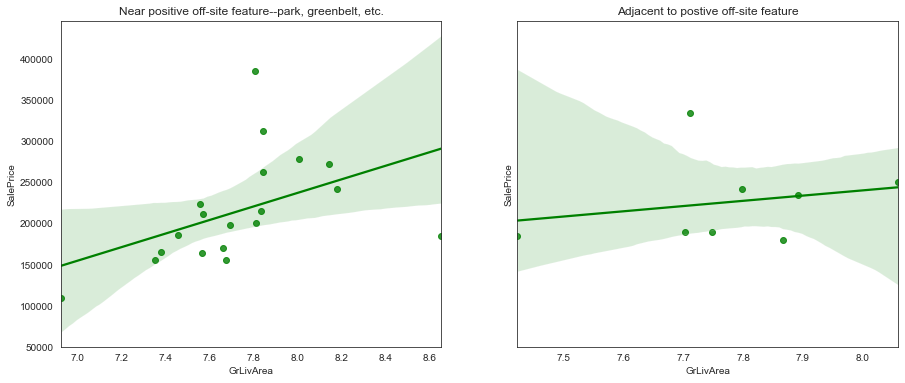

In [92]:
fig, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

data = df.loc[df['Condition1'].isin(['Norm'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes1)
axes1.set_title('Normal')

data = df.loc[df['Condition1'].isin(['Feedr'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes2)
axes2.set_title('Adjacent to feeder street')

data = df.loc[df['Condition1'].isin(['Artery'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes3)
axes3.set_title('Adjacent to arterial street')

fig, (axes1, axes2, axes3, axes4) = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

data = df.loc[df['Condition1'].isin(['RRNe'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes1)
axes1.set_title('Within 200 of East-West Railroad')

data = df.loc[df['Condition1'].isin(['RRAe'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes2)
axes2.set_title('Adjacent to East-West Railroad')

data = df.loc[df['Condition1'].isin(['RRAn'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes3)
axes3.set_title('Adjacent to North-South Railroad')

data = df.loc[df['Condition1'].isin(['RRNn'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes4)
axes4.set_title('Within 200 of North-South Railroad')

fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

data = df.loc[df['Condition1'].isin(['PosN'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes1)
axes1.set_title('Near positive off-site feature--park, greenbelt, etc.')

data = df.loc[df['Condition1'].isin(['PosA'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes2)
axes2.set_title('Adjacent to postive off-site feature')


From the comparison of scatter plots above it can be assumed that proximity to feeder or arterial street does lower the house price (lower regression slope compared to Normal houses). Therefore, these can be combined and factorized into a new variable, street_proximity
Proximity to railways or off-site features do not seem to have an impact on house prices

In [93]:
df['street_proximity'] = 0
df.loc[df['Condition1'].isin(['Feedr','Artery']) | df['Condition2'].isin(['Feedr','Artery']),'street_proximity'] = 1
del df['Condition1']
del df['Condition2']
DISCRETE_VARIABLES.remove('Condition1')
DISCRETE_VARIABLES.remove('Condition2')

### Exterior

Too diverse and distributed to extract meaningful information. Feature is dropped

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

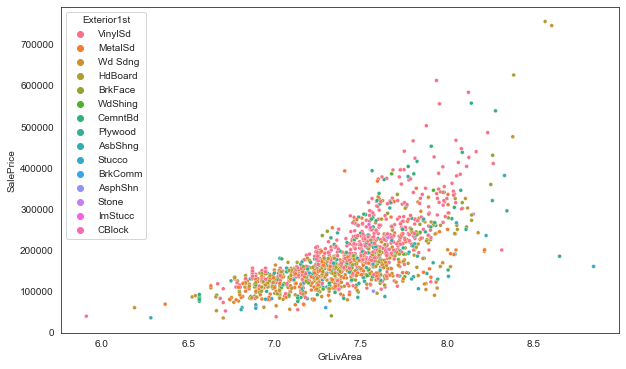

In [94]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Exterior1st", s=15, data=df)

In [95]:
del df["Exterior1st"]
del df["Exterior2nd"]
DISCRETE_VARIABLES.remove('Exterior1st')
DISCRETE_VARIABLES.remove('Exterior2nd')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

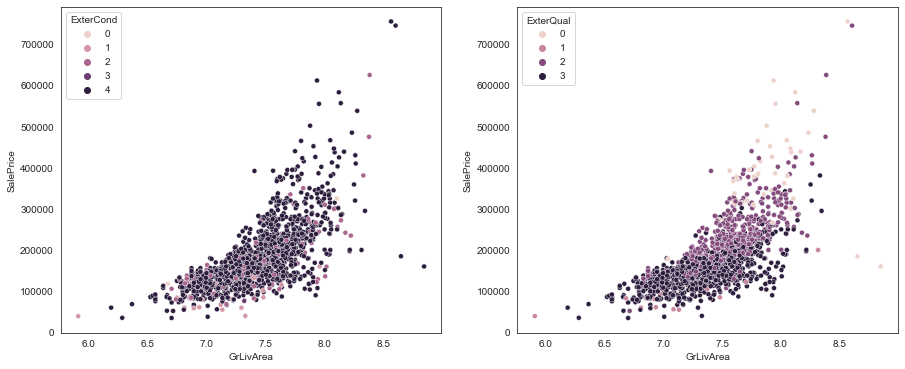

In [96]:
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(15,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="ExterCond", s=25, data=df, ax=axes1)
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="ExterQual", s=25, data=df, ax=axes2)

Present exterior material condition does not show any meaningful relationship with the house price. However, the quality of the material on the exterior does have a positive impact on the price. Based on our findings we can drop ExterCond

In [97]:
del df['ExterCond']
DISCRETE_VARIABLES.remove('ExterCond')

### Foundation

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

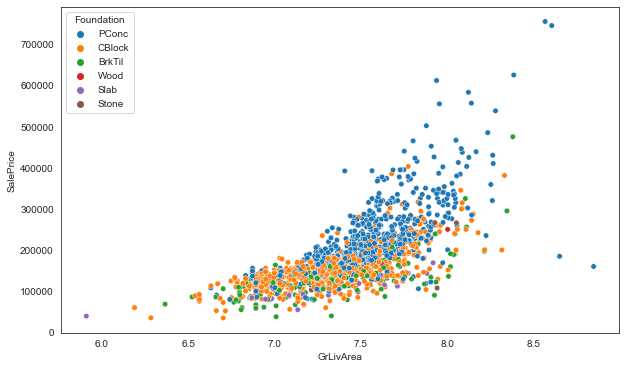

In [98]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Foundation", s=30, data=df)

The type of foundation has an effect on the overall house prices. However, a subset of the foundation types dominate the dataset and we will therefore ignore the others

In [99]:
data = pd.get_dummies(df["Foundation"], prefix="f")
del data["f_Slab"]
del data["f_Stone"]
del data["f_Wood"]
df = pd.concat([df, data], axis=1)
del df["Foundation"]

DISCRETE_VARIABLES.remove('Foundation')

### Garage Type

GarageType is assumed to be not so important as having a Garage (has_GarageType). This feature can be dropped

In [100]:
del df['GarageType']
DISCRETE_VARIABLES.remove('GarageType')

### Heating

Most of the houses have Gas-based heating and therefore the feature can be dropped

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

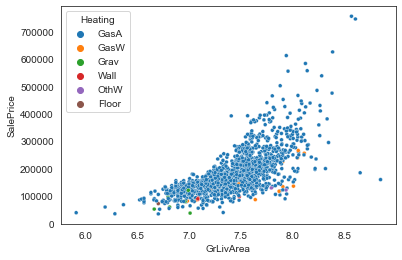

In [101]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Heating", s=15, data=df)

In [102]:
del df['Heating']
del df["HeatingQC"]
DISCRETE_VARIABLES.remove('Heating')
DISCRETE_VARIABLES.remove('HeatingQC')

### House Style, Land Contour, Lot Configuration

No good pattern is observed with HouseStyle and LotConfig    
Land Contour contains the same information covered by Land Slope    
Therefore, these columns are dropped

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

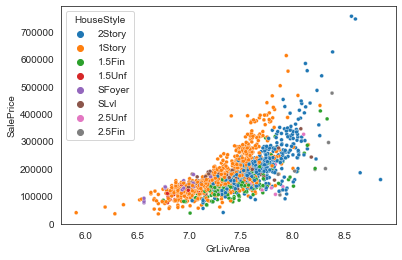

In [103]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="HouseStyle", s=15, data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

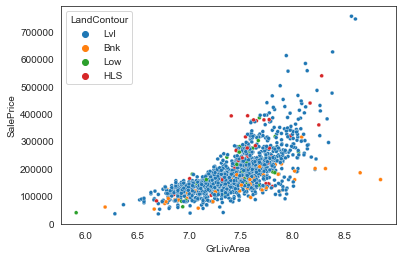

In [104]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LandContour", s=15, data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

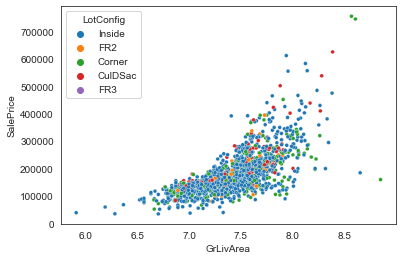

In [105]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LotConfig", s=15, data=df)

In [106]:
del df["HouseStyle"]
del df["LandContour"]
del df["LotConfig"]
DISCRETE_VARIABLES.remove('HouseStyle')
DISCRETE_VARIABLES.remove('LandContour')
DISCRETE_VARIABLES.remove('LotConfig')

### Type of Dwelling and Zoning

- MSSubCLass identifies the type of dwelling involved in the sale and from the below graph it is evident that no clear pattern can be drawn to determine iys effect on the SalePrice. The column is dropped.
- MSZoning identifies the general zoning classification of the sale and given that mojority of the houses are in residential low or medium density zones it can be safely assumed that this feature is not that important.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

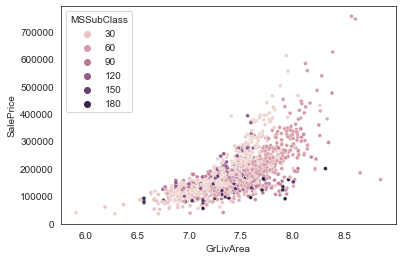

In [107]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MSSubClass", s=15, data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

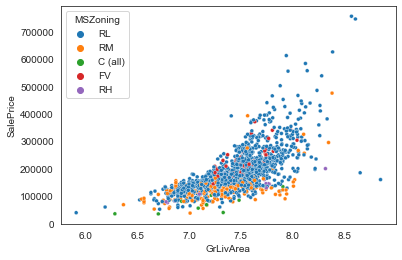

In [108]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MSZoning", s=15, data=df)

In [109]:
del df['MSSubClass']
del df['MSZoning']
DISCRETE_VARIABLES.remove('MSSubClass')
DISCRETE_VARIABLES.remove('MSZoning')

### Masonry Veneer Type

- MasVnrType is dropped as none of the realizations have a pattern distinct from the overall trend line

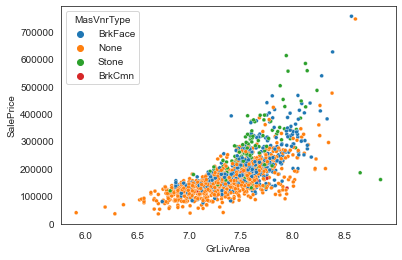

In [110]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MasVnrType", s=15, data=df);

In [111]:
del df["MasVnrType"]
DISCRETE_VARIABLES.remove('MasVnrType')

### Miscellaneous Features

 - Some of the other features in the population data that do not provide any meaningful pattern are also dropped for simplicity

In [112]:
del df["RoofMatl"]
del df["RoofStyle"]
del df["Street"]
DISCRETE_VARIABLES.remove('RoofMatl')
DISCRETE_VARIABLES.remove('RoofStyle')
DISCRETE_VARIABLES.remove('Street')

### Sale Type and Condition

Partial and abnormal sales seem to have a positive and negative impact on SalePrice respectively.     
Although, the impact is not found to be very significant

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

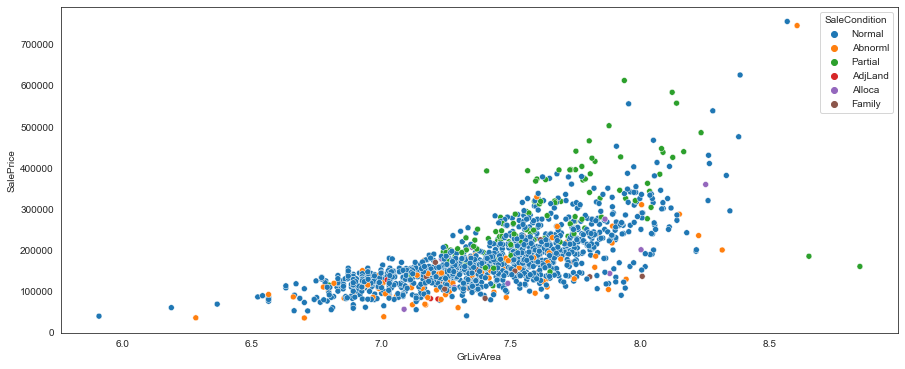

In [113]:
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleCondition", s=35, data=df, ax=ax)

Text(0.5, 1.0, 'New Homes')

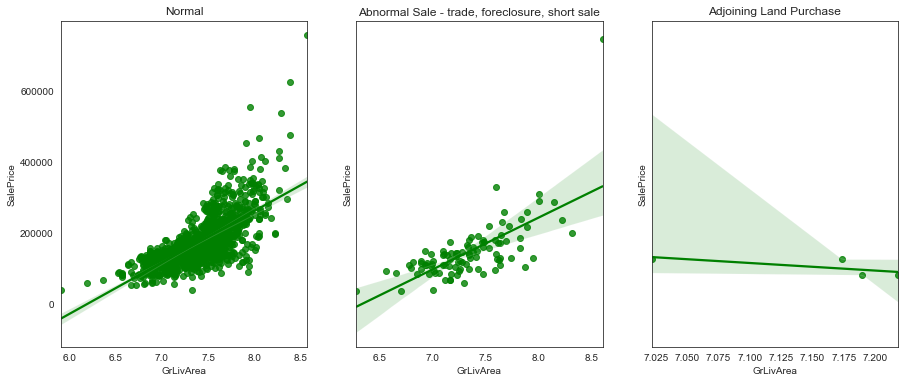

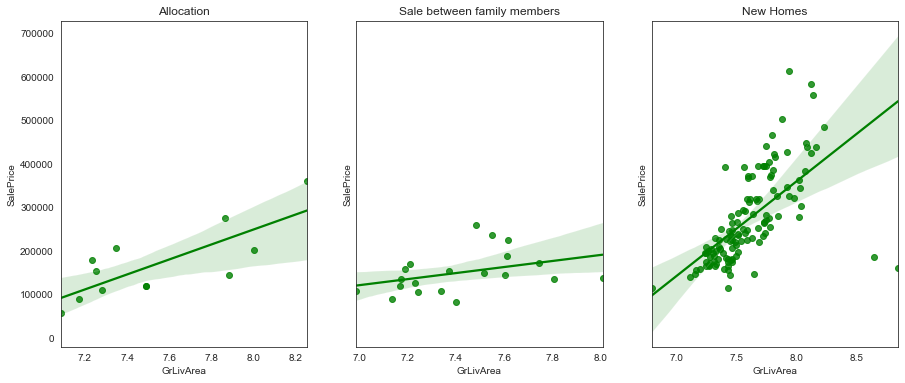

In [114]:
fig, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

data = df.loc[df['SaleCondition'].isin(['Normal'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes1)
axes1.set_title('Normal')

data = df.loc[df['SaleCondition'].isin(['Abnorml'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes2)
axes2.set_title('Abnormal Sale - trade, foreclosure, short sale')

data = df.loc[df['SaleCondition'].isin(['AdjLand'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes3)
axes3.set_title('Adjoining Land Purchase')

fig, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

data = df.loc[df['SaleCondition'].isin(['Alloca'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes1)
axes1.set_title('Allocation')

data = df.loc[df['SaleCondition'].isin(['Family'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes2)
axes2.set_title('Sale between family members')

data = df.loc[df['SaleCondition'].isin(['Partial'])]
sns.regplot(x="GrLivArea", y="SalePrice", data=data, color = 'g', ax=axes3)
axes3.set_title('New Homes')

In [115]:
df["sale_Partial"] = df["SaleCondition"].apply(lambda x: 1 if x == "Partial" else 0)
df["sale_Abnormal"] = df["SaleCondition"].apply(lambda x: 1 if x == "Abnorml" else 0)

New homes are clearly priced higher than the rest

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

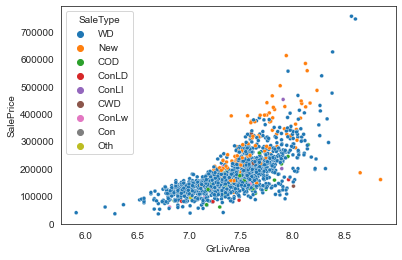

In [116]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleType", s=15, data=df)

In [117]:
df["is_NewHome"] = df["SaleType"].apply(lambda x: 1 if x == "New" else 0)

In [118]:
del df["SaleCondition"]
del df["SaleType"]
DISCRETE_VARIABLES.remove('SaleCondition')
DISCRETE_VARIABLES.remove('SaleType')

### House Remodeling

We do see a majority of the houses were remodeled over the years

In [119]:
error = (df['YearRemodAdd'] < df['YearBuilt'])
try:
    assert error.sum() == 0
except AssertionError:
    df.loc[error, "YearRemodAdd"] = df.loc[error, "YearBuilt"]

In [120]:
marker = (df['YearRemodAdd'] > df['YearBuilt'])
df['was_remodeled'] = 0
df.loc[marker, 'was_remodeled'] = 1

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

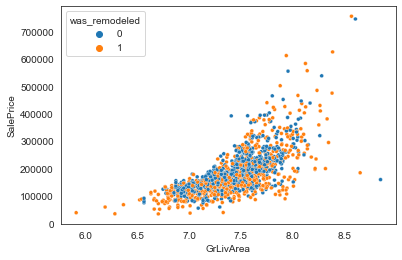

In [121]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="was_remodeled", s=15, data=df)

### House Age

Recently built or remodeled houses command higher sale price

In [122]:
df["yrs_since_built"] = df["YrSold"] - df["YearBuilt"]
df["yrs_since_remodeled"] = df["YrSold"] - df["YearRemodAdd"]

In [123]:
df["recently_built"] = df["yrs_since_built"].apply(lambda x: 1 if x <= 10 else 0)
df["recently_remodeled"] = df["yrs_since_remodeled"].apply(lambda x: 1 if x <= 10 else 0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

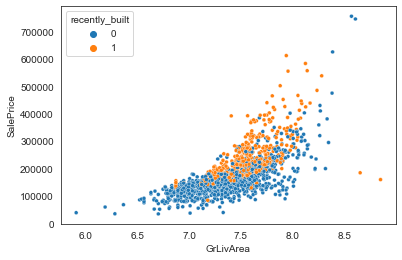

In [124]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="recently_built", s=15, data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

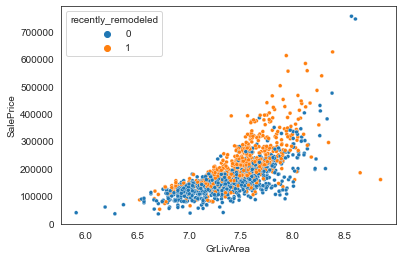

In [125]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="recently_remodeled", s=15, data=df)

In [126]:
del df["YrSold"]
del df["YearBuilt"]
del df["YearRemodAdd"]
DISCRETE_VARIABLES.remove('YrSold')
DISCRETE_VARIABLES.remove('YearBuilt')
DISCRETE_VARIABLES.remove('YearRemodAdd')

### Neighborhood

Understand the price distribution of houses based on the neighborhood

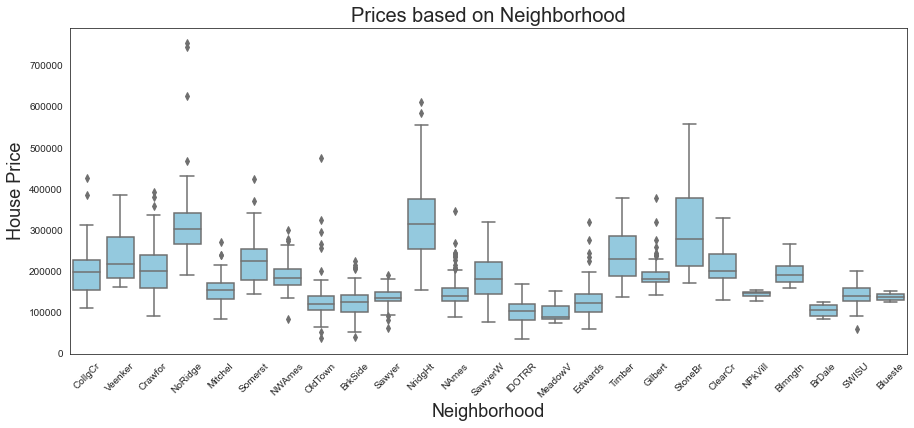

In [127]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, ax=ax, color='skyblue')
ax.set_title("Prices based on Neighborhood", fontsize=20)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("House Price", fontsize=18);

Price variation based on neighborhood is evident from the above graph. We dummify the 25 neighborhoods in the dataset to account for their affect on the SalePrice

In [128]:
neighborhood = pd.get_dummies(df["Neighborhood"], prefix="nd")
df = pd.concat([df, neighborhood], axis=1)

In [129]:
del df["Neighborhood"]
DISCRETE_VARIABLES.remove('Neighborhood')

In [130]:
df.head()

,Id,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,TotalSF,TotalPorchSF,TotalBath,has_2ndFlrSF,has_TotalBsmtSF,has_Fireplaces,has_GarageArea,has_PoolArea,has_TotalPorchSF,build_type_1Fam,build_type_2Fam,build_type_Twnhs,AirCon,street_proximity,f_BrkTil,f_CBlock,f_PConc,sale_Partial,sale_Abnormal,is_NewHome,was_remodeled,yrs_since_built,yrs_since_remodeled,recently_built,recently_remodeled,nd_Blmngtn,nd_Blueste,nd_BrDale,nd_BrkSide,nd_ClearCr,nd_CollgCr,nd_Crawfor,nd_Edwards,nd_Gilbert,nd_IDOTRR,nd_MeadowV,nd_Mitchel,nd_NAmes,nd_NPkVill,nd_NWAmes,nd_NoRidge,nd_NridgHt,nd_OldTown,nd_SWISU,nd_Sawyer,nd_SawyerW,nd_Somerst,nd_StoneBr,nd_Timber,nd_Veenker
0,1,10.427530,3,0,0,6,4,196,2,2,3,3,2,706,5,0,150,198.284295,4,856,854,0,7.600483,1,0,2,1,3,1,2,8,6,0,1,2,204.517915,4,4,2,0,61,0,0,0,0,2,208500,20.729442,11.124668,3.5,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,5,5,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,10.596444,3,0,0,5,7,0,3,2,3,1,0,978,5,0,284,264.601145,4,1262,0,0,7.284379,0,1,2,0,3,1,3,6,6,1,1,2,177.329636,4,4,2,298,0,0,0,0,0,5,181500,20.638826,23.806809,2.5,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,10.807339,0,0,0,6,4,162,2,2,3,2,2,486,5,0,434,209.206786,4,920,866,0,7.645779,1,0,2,1,3,1,2,6,6,1,1,2,222.579733,4,4,2,0,42,0,0,0,0,9,223500,21.023347,9.197105,3.5,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,7,6,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,10.589518,0,0,0,6,4,0,3,3,1,3,0,216,5,0,540,180.779930,4,961,756,0,7.604738,1,0,1,0,3,1,2,7,6,1,2,3,232.664362,4,4,2,0,35,272,0,0,0,2,140000,20.527193,24.135762,2.0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,91,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,11.124528,0,0,0,7,4,350,2,2,3,0,2,655,5,0,490,246.150776,4,1145,1053,0,7.862154,1,0,2,1,4,1,2,9,6,1,1,3,288.451992,4,4,2,192,84,0,0,0,0,12,250000,22.227136,22.977765,3.5,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,8,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Removing Outliers

Plotting the SalePrice with the Total Living Area indicates the presence of outliers. We will use z-score individually on both the columns to detect and remove these from the dataset.

In [131]:
df['zscore_SalePrice'] = (df['SalePrice'] - df['SalePrice'].mean())/df['SalePrice'].std()

In [132]:
df['zscore_GrLivArea'] = (df['GrLivArea'] - df['GrLivArea'].mean())/df['GrLivArea'].std()

In [133]:
df = df[(df.zscore_GrLivArea>-3)&(df.zscore_GrLivArea<3)&(df.zscore_SalePrice>-5)&(df.zscore_SalePrice<5)]
df.shape

(1449, 99)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

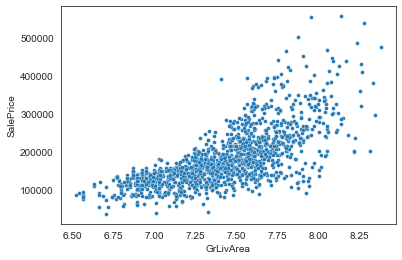

In [134]:
sns.scatterplot(x="GrLivArea", y="SalePrice", s=15, data=df)

### Final dataset

In [135]:
# Remove the zscore columns
del df['zscore_SalePrice']
del df['zscore_GrLivArea']

In [136]:
df.shape

(1449, 97)

In [137]:
df.head()

,Id,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,TotalSF,TotalPorchSF,TotalBath,has_2ndFlrSF,has_TotalBsmtSF,has_Fireplaces,has_GarageArea,has_PoolArea,has_TotalPorchSF,build_type_1Fam,build_type_2Fam,build_type_Twnhs,AirCon,street_proximity,f_BrkTil,f_CBlock,f_PConc,sale_Partial,sale_Abnormal,is_NewHome,was_remodeled,yrs_since_built,yrs_since_remodeled,recently_built,recently_remodeled,nd_Blmngtn,nd_Blueste,nd_BrDale,nd_BrkSide,nd_ClearCr,nd_CollgCr,nd_Crawfor,nd_Edwards,nd_Gilbert,nd_IDOTRR,nd_MeadowV,nd_Mitchel,nd_NAmes,nd_NPkVill,nd_NWAmes,nd_NoRidge,nd_NridgHt,nd_OldTown,nd_SWISU,nd_Sawyer,nd_SawyerW,nd_Somerst,nd_StoneBr,nd_Timber,nd_Veenker
0,1,10.427530,3,0,0,6,4,196,2,2,3,3,2,706,5,0,150,198.284295,4,856,854,0,7.600483,1,0,2,1,3,1,2,8,6,0,1,2,204.517915,4,4,2,0,61,0,0,0,0,2,208500,20.729442,11.124668,3.5,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,5,5,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,10.596444,3,0,0,5,7,0,3,2,3,1,0,978,5,0,284,264.601145,4,1262,0,0,7.284379,0,1,2,0,3,1,3,6,6,1,1,2,177.329636,4,4,2,298,0,0,0,0,0,5,181500,20.638826,23.806809,2.5,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,10.807339,0,0,0,6,4,162,2,2,3,2,2,486,5,0,434,209.206786,4,920,866,0,7.645779,1,0,2,1,3,1,2,6,6,1,1,2,222.579733,4,4,2,0,42,0,0,0,0,9,223500,21.023347,9.197105,3.5,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,7,6,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,10.589518,0,0,0,6,4,0,3,3,1,3,0,216,5,0,540,180.779930,4,961,756,0,7.604738,1,0,1,0,3,1,2,7,6,1,2,3,232.664362,4,4,2,0,35,272,0,0,0,2,140000,20.527193,24.135762,2.0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,91,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,11.124528,0,0,0,7,4,350,2,2,3,0,2,655,5,0,490,246.150776,4,1145,1053,0,7.862154,1,0,2,1,4,1,2,9,6,1,1,3,288.451992,4,4,2,192,84,0,0,0,0,12,250000,22.227136,22.977765,3.5,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,8,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [138]:
df.to_csv('data/{}-final.csv'.format(filename), index=False)

In [139]:
# Global variables
%store CONTINUOUS_VARIABLES
%store DISCRETE_VARIABLES
%store TARGET_VARIABLE
%store filename

Stored 'CONTINUOUS_VARIABLES' (list)
Stored 'DISCRETE_VARIABLES' (list)
Stored 'TARGET_VARIABLE' (list)
Stored 'filename' (str)
